# Cluster Analaysis of abalone data set

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

#To show verson of panda, numpy and seaborn

In [9]:
print(f'panda version = {pd.__version__}')
print(f'numpy version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

panda version = 0.24.2
numpy version = 1.16.4
seaborn version = 0.9.0


#read the data from csv

In [21]:
df=pd.read_csv('abalone_data.csv')
df.sample(30)

,LENGTH,DIAMETER,HEIGHT,WEIGHT,RING,AGE
6,0.770,0.600,0.215,2.1945,10,OLD
3,0.780,0.630,0.215,2.6570,11,OLD
5,0.775,0.630,0.250,2.7795,12,OLD
16,0.160,0.120,0.035,0.0210,5,BABY
9,0.765,0.585,0.180,2.3980,12,OLD
18,0.155,0.105,0.050,0.0175,4,BABY
4,0.775,0.570,0.220,2.0320,17,OLD
17,0.160,0.120,0.020,0.0180,4,BABY
46,0.500,0.365,0.125,0.5280,9,ADULT
45,0.480,0.335,0.125,0.5240,7,ADULT


 #display total data by age

In [22]:
df.AGE.value_counts()

BABY     21
OLD      16
ADULT    15
Name: AGE, dtype: int64

In [23]:
df.columns

Index(['LENGTH', 'DIAMETER', 'HEIGHT', 'WEIGHT', 'RING', 'AGE'], dtype='object')

 #Pair plot to see correlation between attributes

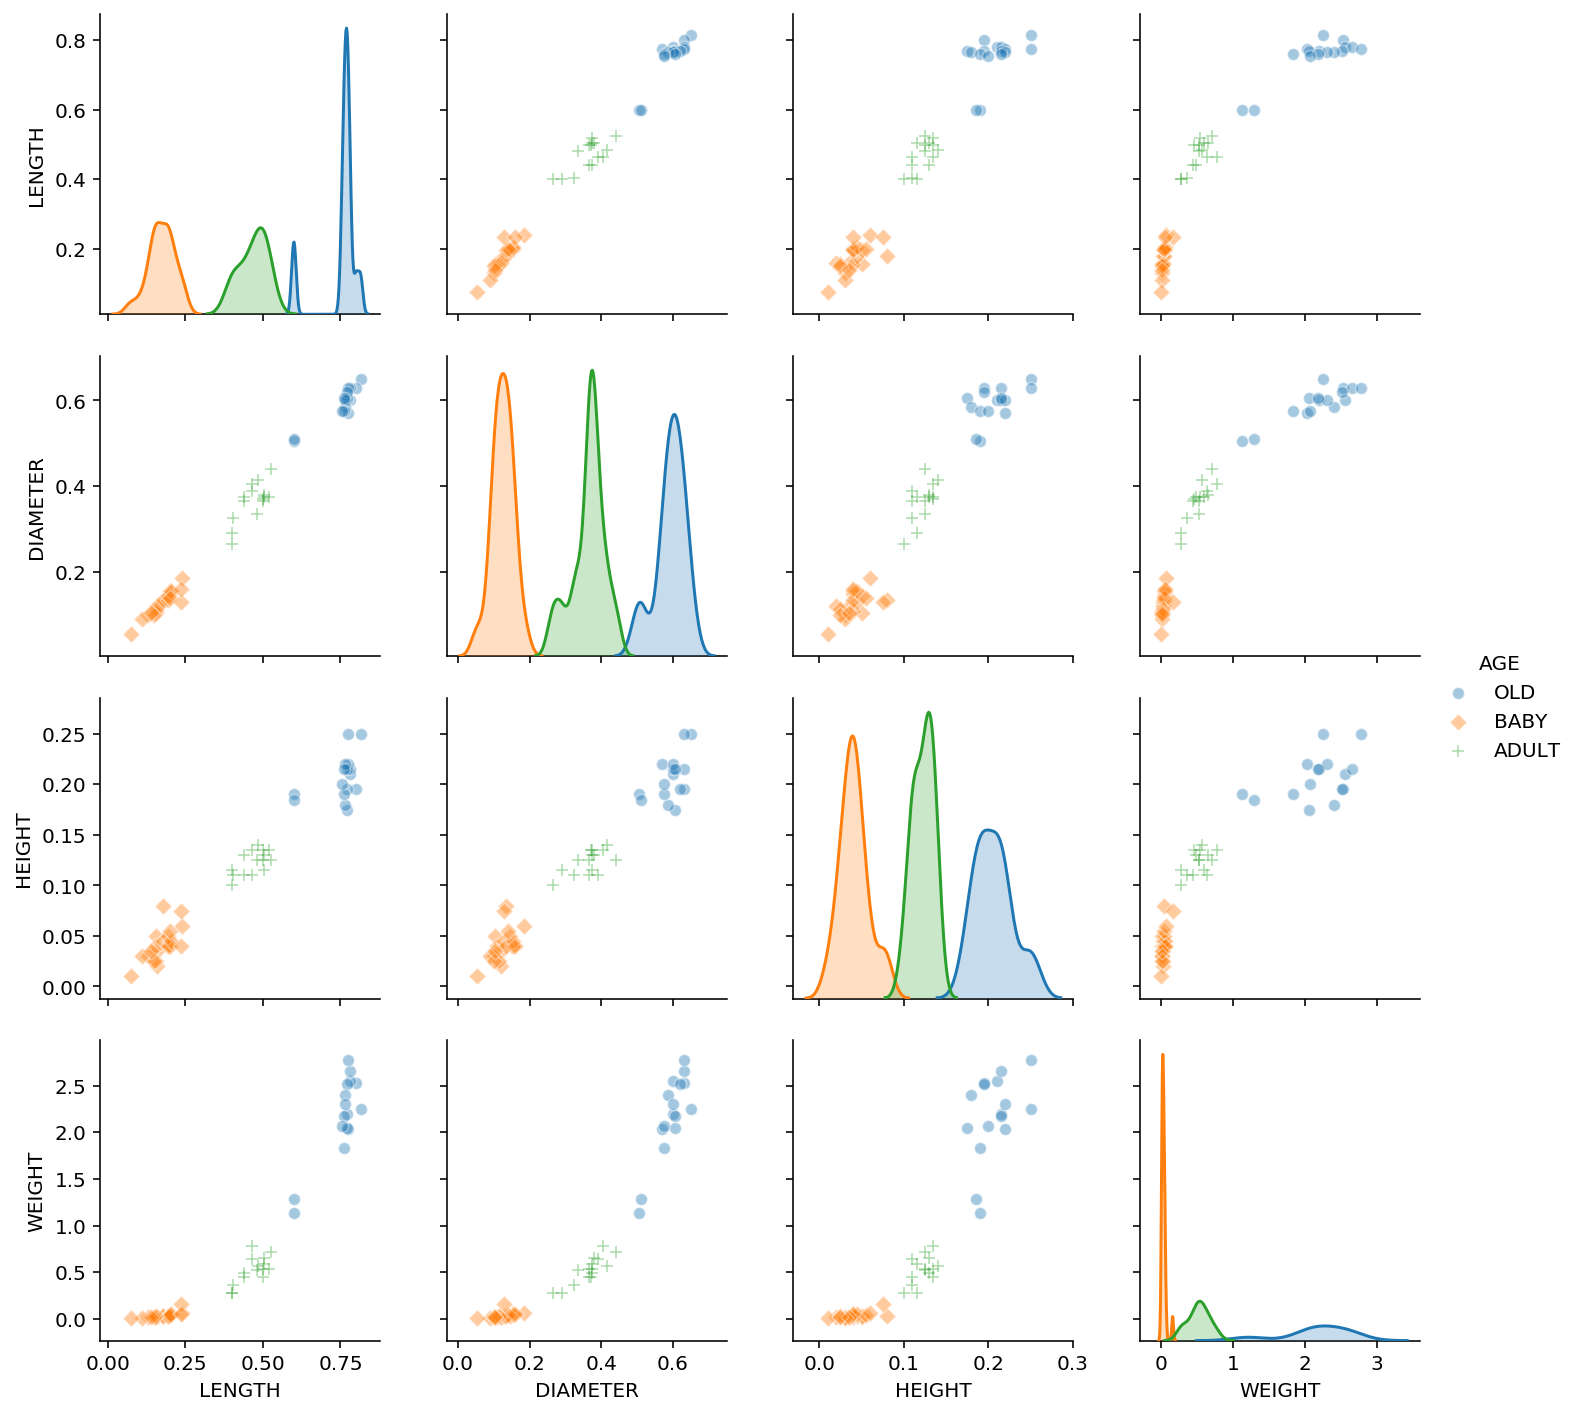

In [25]:
sns.pairplot(df, vars=['LENGTH','DIAMETER','HEIGHT','WEIGHT'],
              hue='AGE',
              markers=['o','D','+'],
              plot_kws={'alpha': .4});

#pick two relevant attributes to go further analysis with scatter plot

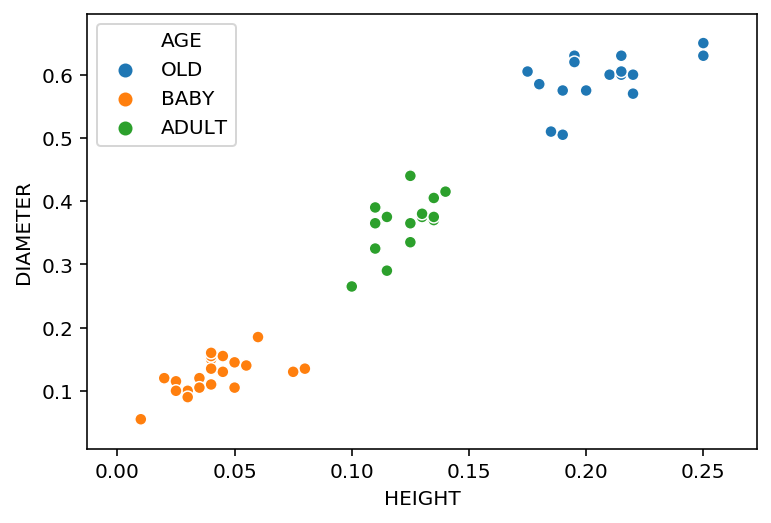

In [27]:
sns.scatterplot(data=df, x='HEIGHT', y='DIAMETER', hue='AGE')

#Begin cluster analysis by randomly pick 3 centroids 

In [29]:
rx=np.random.uniform(0,0.25,3)
rx

array([0.0562736 , 0.22154275, 0.22881367])

In [30]:
ry=np.random.uniform(0,0.5,3)
ry

array([0.23538196, 0.37271994, 0.3330674 ])

#Plot random centroids on scatter plot

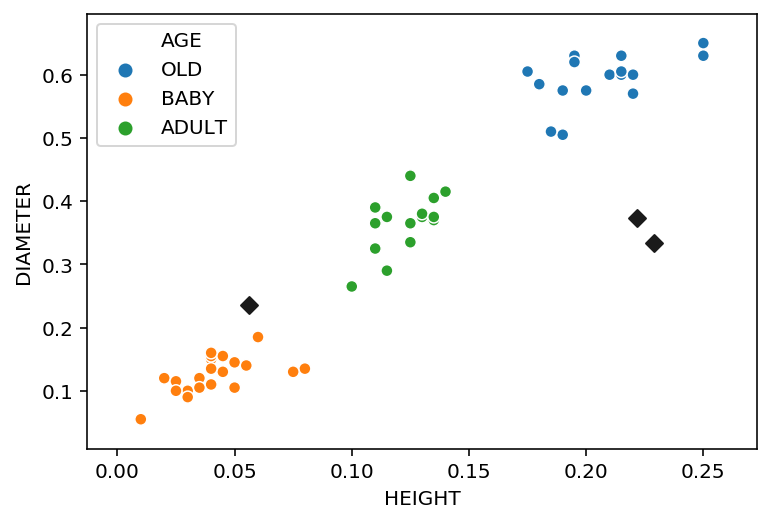

In [31]:
sns.scatterplot(data=df, x='HEIGHT', y='DIAMETER', hue='AGE')
plt.scatter(rx,ry, color='.1', marker='D')

#Find the optimum centroids by using Kmeans method.

In [32]:
from sklearn.cluster import KMeans

In [33]:
model=KMeans(n_clusters=3)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
X=df[['DIAMETER','HEIGHT']]
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
model.cluster_centers_

array([[0.36466667, 0.12266667],
       [0.12571429, 0.04142857],
       [0.593125  , 0.2065625 ]])

 #Plot the optimum centroids

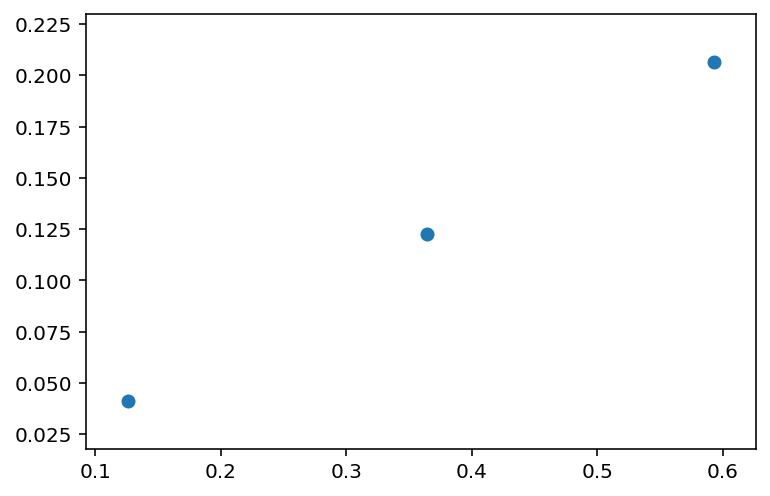

In [36]:
 plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1])

#check labels from model with group of age

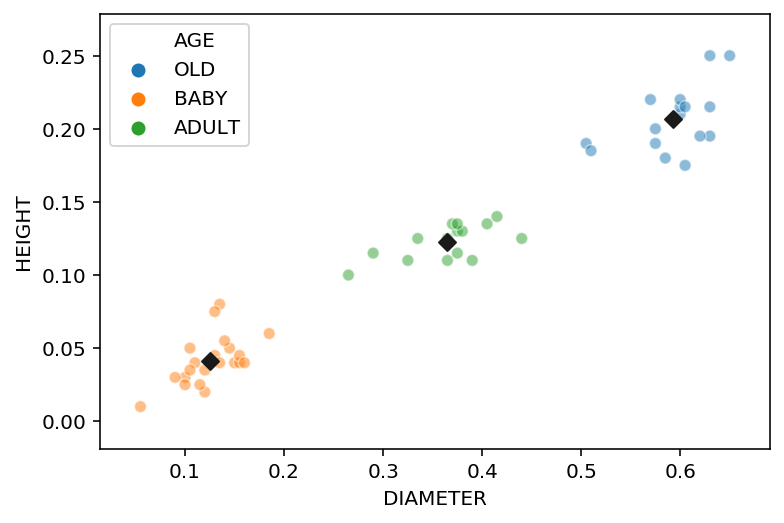

In [37]:
sns.scatterplot(data=df, x='DIAMETER', y='HEIGHT', hue='AGE',alpha=.5)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='.1', marker='D')

In [38]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [39]:
df['AGE'].values

array(['OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD',
       'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'OLD', 'BABY', 'BABY',
       'BABY', 'BABY', 'BABY', 'BABY', 'BABY', 'BABY', 'BABY', 'BABY',
       'BABY', 'BABY', 'BABY', 'BABY', 'BABY', 'BABY', 'BABY', 'BABY',
       'BABY', 'BABY', 'BABY', 'ADULT', 'ADULT', 'ADULT', 'ADULT',
       'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT',
       'ADULT', 'ADULT', 'ADULT', 'ADULT'], dtype=object)

In [41]:
df['cluster']=model.labels_
df

,LENGTH,DIAMETER,HEIGHT,WEIGHT,RING,AGE,cluster
0,0.815,0.650,0.250,2.2550,14,OLD,2
1,0.800,0.630,0.195,2.5260,23,OLD,2
2,0.780,0.600,0.210,2.5480,11,OLD,2
3,0.780,0.630,0.215,2.6570,11,OLD,2
4,0.775,0.570,0.220,2.0320,17,OLD,2
5,0.775,0.630,0.250,2.7795,12,OLD,2
6,0.770,0.600,0.215,2.1945,10,OLD,2
7,0.770,0.605,0.175,2.0505,11,OLD,2
8,0.770,0.620,0.195,2.5155,12,OLD,2
9,0.765,0.585,0.180,2.3980,12,OLD,2


#Plot crosstab in order to check if the model can classify groups correctly

In [42]:
pd.crosstab(df['AGE'],df['cluster'])

cluster,0,1,2
AGE,,,
ADULT,15,0,0
BABY,0,21,0
OLD,0,0,16


#Plot scatter plot again but legen by cluster

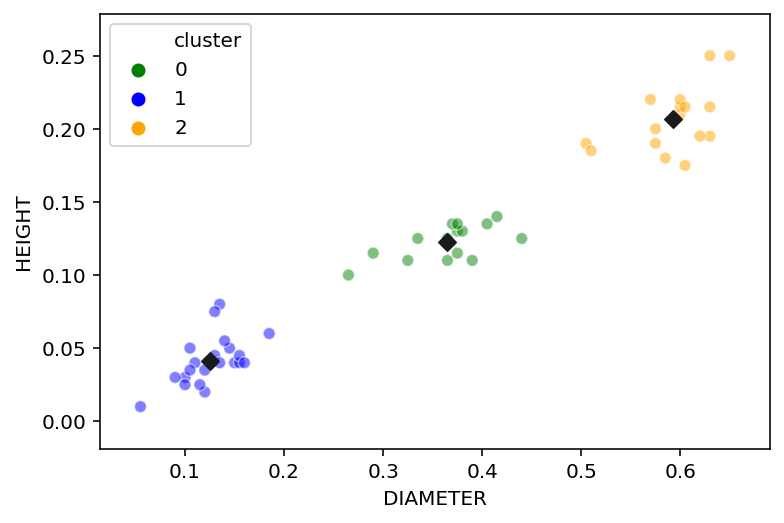

In [43]:
sns.scatterplot(data=df, x='DIAMETER', y='HEIGHT', hue='cluster',alpha=.5, palette=['green','blue','orange'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='.1', marker='D')

#Use the model to predict by key in value

In [44]:
model.predict([[0.1,0.2],[0.35,0.11],[0.8,0.27]])

array([1, 0, 2], dtype=int32)

#Use elbow method to find the right k

[[1, 2.332228365384615], [2, 0.4965029235382308], [3, 0.08511778273809524], [4, 0.0643130478896104], [5, 0.04672443181818184], [6, 0.03349482142857145]]


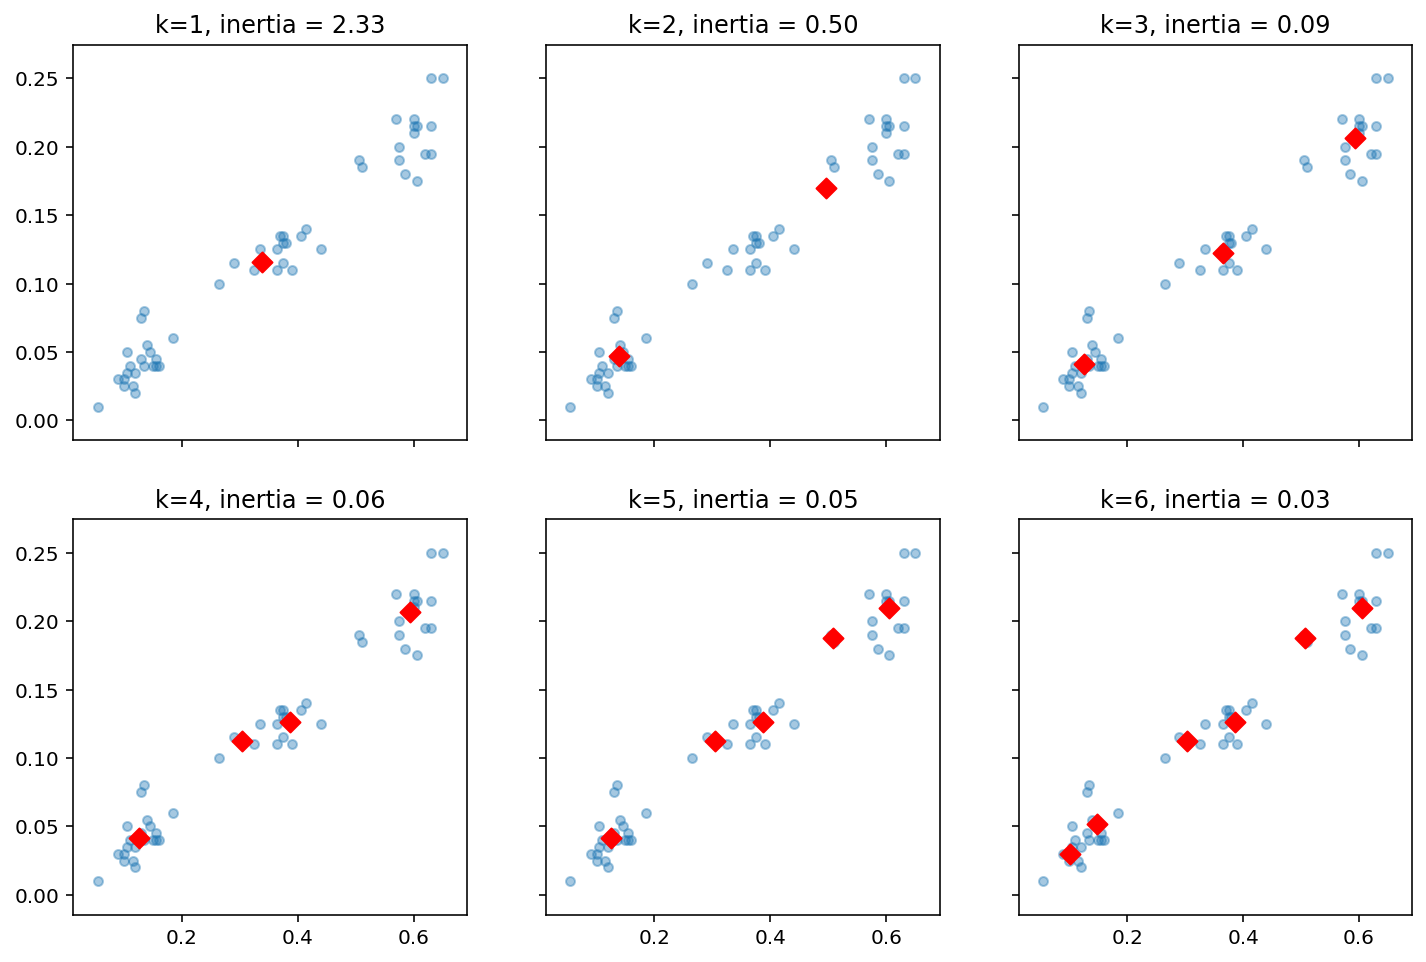

In [45]:
fig, ax = plt.subplots(2,3, figsize=(12,8), sharex=True, sharey=True)
k=1
ssd=[] #sum of squared distances of samples to thier closet cluster center
for r in range(ax.shape[0]):
    for c in range(ax.shape[1]):
        ax[r, c].scatter(data=df, x='DIAMETER', y='HEIGHT', s=20, alpha=.4)
        m=KMeans(n_clusters=k)
        m.fit(X)
        ssd.append([k,m.inertia_])
        ax[r,c].scatter(m.cluster_centers_[:, 0], m.cluster_centers_[:, 1], color='r',marker='D', s=50)
        ax[r,c].set_title(f'k={k}, inertia = {m.inertia_:,.2f}')
        k += 1
print(ssd)

In [46]:
xy=np.array(ssd)
print(xy)

[[1.         2.33222837]
 [2.         0.49650292]
 [3.         0.08511778]
 [4.         0.06431305]
 [5.         0.04672443]
 [6.         0.03349482]]


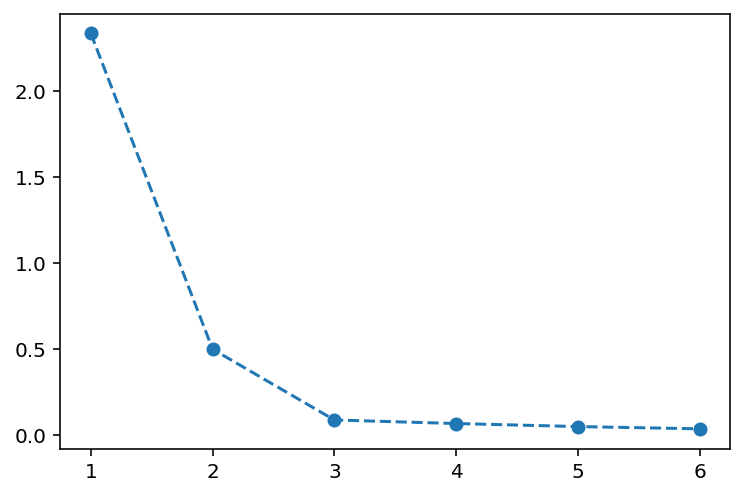

In [47]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o')